## Accessing Data from the MAAP

In this example, we demonstrate how to access data from the MAAP using the `getLocalPath()` function. At this time, this procedure is the same for user-contributed data added to the store.

We import the `os` module, import the `MAAP` package, and create a new MAAP class.

In [1]:
# import os module
import os

# import the MAAP package
from maap.maap import MAAP

# create MAAP class
maap = MAAP()

For this example, the `site_name` additional attribute is used to search for granules that have been tagged as part of the *Mondah Forest Gabon* research site. For more information about searching for granules in MAAP, please see https://docs.maap-project.org/en/latest/technical_tutorials/search/granules.html.

In [2]:
# assign Mondah Forest Gabon site name
SHORTNAME = "AFLVIS2"
SITENAME = 'Mondah Forest Gabon'

# search for granules with site name
results = maap.searchGranule(short_name=SHORTNAME,site_name=SITENAME)

We assign a variable (in this case, `data_file`) to the first result of our search from the cell above.

In [3]:
# grab first result
data_file = results[0]

A data directory is then set, and if the directory does not already exist, it is created. The file from our search is then downloaded into the file system in this directory. Here, the function `getLocalPath()` is accessing the data stored on the MAAP's Simple Storage Service (S3) bucket and downloading it directly to the path provided.

In [4]:
# set data directory
dataDir = './data'

# check if directory exists -> if directory doesn't exist, directory is created
if not os.path.exists(dataDir):
    os.mkdir(dataDir)

# download file from search into data directory
data = data_file.getLocalPath(dataDir)
data

'./data/LVIS2_Gabon2016_0308_R1808_038002.TXT'

Now we can see that the data directory has been created and the 'LVIS2_Gabon2016_0308_R1808_038002.TXT' file is downloaded into the directory. The downloaded file remains in the data directory until the user deletes it.

## Accessing Data from AWS Requester Pays Buckets

Some data is cloud available but in requester pays buckets. In this example, we use Rasterio, Boto3, and MAAP's `aws.requester_pays_credentials()` function to retrieve data within the `usgs-landsat` requester pays bucket.

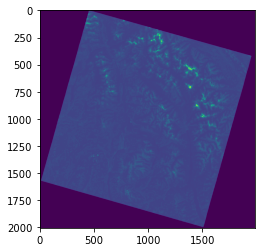

In [5]:
import boto3
import rasterio as rio

from maap.maap import MAAP
from rasterio.plot import show
from rasterio.session import AWSSession


maap = MAAP(maap_host='api.ops.maap-project.org')
credentials = maap.aws.requester_pays_credentials()

boto3_session = boto3.Session(
    aws_access_key_id=credentials['aws_access_key_id'],
    aws_secret_access_key=credentials['aws_secret_access_key'],
    aws_session_token=credentials['aws_session_token']
)

aws_session = AWSSession(boto3_session, requester_pays=True)
file_s3 = 's3://usgs-landsat/collection02/level-2/standard/oli-tirs/2015/044/025/LC08_L2SP_044025_20150812_20200908_02_T1/LC08_L2SP_044025_20150812_20200908_02_T1_SR_B2.TIF'
with rio.Env(aws_session):
    with rio.open(file_s3, 'r') as src:
        # list of overviews
        oviews = src.overviews(1)
        # get second item from list to retrieve a thumbnail
        oview = oviews[1]
        # read first band of file and set shape of new output array
        thumbnail = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))
# now display the thumbnail
show(thumbnail)

You may adjust the expiration time of the AWS credentials generated by `maap.aws.requester_pays_credentials()`: 

In [ ]:
# Credential expiration time in seconds (defaults to 12 hours)
maap.aws.requester_pays_credentials(expiration=3600)